# Exploratory data analysis (EDA) of apartments data

## Libraries and settings

In [1]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/DA_Project/Project/Minimum/6&7


## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [2]:
# Read and select variables
df = pd.read_csv("bmw_data_enriched.csv")[[ 'web-scraper-order', 
                                                        'model_raw',
                                                        'Location',
                                                        'PLZ',
                                                        'Year',
                                                        'price',
                                                        'km',
                                                        'km_per_year',]]

# Remove duplicates
df = df.drop_duplicates()
df.head(5)

# Remove missing values
df = df.dropna()
df.head(5)

,web-scraper-order,model_raw,Location,PLZ,Year,price,km,km_per_year
0,1705078003-1,X3 xDrive 20d xLine Steptronic,GE,1227,2016,22900,119500.0,14937.50
1,1705078003-2,540i,BL,4461,2006,13750,124900.0,6938.89
2,1705078003-3,225xe iPerformance Active Tourer Steptronic M ...,BL,4460,2019,28800,28950.0,5790.00
3,1705078003-4,316i Compact,ZG,6300,2000,1100,248013.0,10333.88
4,1705078003-5,530xi Steptronic,LU,6010,2008,10900,160000.0,10000.00


### Quantiles original values

In [3]:
df[['price','km', 'km_per_year', 'Year']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,price,km,km_per_year,Year
0.05,5158.0,9080.0,4370.00,2006.0
0.10,7900.0,15680.0,6000.00,2009.0
0.25,16500.0,41000.0,9400.00,2014.0
0.50,31800.0,84700.0,13200.00,2018.0
0.75,52800.0,146000.0,17214.29,2020.0
0.90,69936.0,199999.4,22480.00,2022.0
0.95,84180.0,235000.0,25920.00,2023.0


### Shape (number of rows and colums)

In [4]:
# Number of rows and columns
print(df.shape)

(877, 8)


### Data types

In [5]:
df.dtypes

web-scraper-order     object
model_raw             object
Location              object
PLZ                    int64
Year                   int64
price                  int64
km                   float64
km_per_year          float64
dtype: object

### Summary statistics of numeric variables

In [6]:
df.describe()

,PLZ,Year,price,km,km_per_year
count,877.000000,877.000000,877.000000,877.000000,877.00
mean,6001.962372,2016.385405,36842.104903,99373.126568,inf
std,2622.442043,5.632356,27547.597096,72679.072768,NaN
min,1000.000000,1982.000000,1100.000000,1000.000000,1000.00
25%,3930.000000,2014.000000,16500.000000,41000.000000,9400.00
50%,6330.000000,2018.000000,31800.000000,84700.000000,13200.00
75%,8404.000000,2020.000000,52800.000000,146000.000000,17214.29
max,9630.000000,2024.000000,300000.000000,467664.000000,inf


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [7]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.km_per_year.median(), 1),
      'Std:', round(df.km_per_year.std(), 1))

# km
print('km:',
      'Count:', round(df.km.count(), 1),
      'Min:', round(df.km.min(), 1),
      'Max:', round(df.km.max(), 1),
      'Mean:', round(df.km.mean(), 1),
      'Median:', round(df.km.median(), 1),
      'Std:', round(df.km.std(), 1))

# km_per_year
print('km_per_year:',
      'Count:', round(df.km_per_year.count(), 1),
      'Min:', round(df.km_per_year.min(), 1),
      'Max:', round(df.km_per_year.max(), 1),
      'Mean:', round(df.km_per_year.mean(), 1),
      'Median:', round(df.km_per_year.median(), 1),
      'Std:', round(df.km_per_year.std(), 1))

Price: Count: 877 Min: 1100 Max: 300000 Mean: 36842.1 Median: 13200.0 Std: nan
km: Count: 877 Min: 1000.0 Max: 467664.0 Mean: 99373.1 Median: 84700.0 Std: 72679.1
km_per_year: Count: 877 Min: 1000.0 Max: inf Mean: inf Median: 13200.0 Std: nan


### Skewness

In [8]:
df[['km_per_year','km', 'km_per_year']].skew()

km_per_year         NaN
km             0.915265
km_per_year         NaN
dtype: float64

### Kurtosis

In [9]:
df[['price','km', 'km_per_year']].kurtosis()

price          10.390361
km              0.860962
km_per_year          NaN
dtype: float64

### Extreme values

In [10]:
# Very low mileage per year
df[df['km_per_year'] <= 5000]

,web-scraper-order,model_raw,Location,PLZ,Year,price,km,km_per_year
19,1705078010-25,iX1 xDrive 30,SG,9443,2023,61700,4000.0,4000.00
22,1705078010-28,Z4 sDrive 20i M Sport,ZH,8134,2021,45900,11000.0,3666.67
33,1705078013-39,535i xDrive Steptronic,VD,1303,2014,27900,31000.0,3100.00
44,1705078016-50,118i,AG,8957,2006,7900,86600.0,4811.11
53,1705078020-59,325xi,VD,1584,2000,8200,105000.0,4375.00
...,...,...,...,...,...,...,...,...
803,1705078477-908,M2 Competition,AG,5702,2020,58900,15499.0,3874.75
822,1705078487-927,420i Cabriolet Luxury Line Steptronic,BE,3177,2018,33900,12000.0,2000.00
838,1705078498-944,i3s (120Ah) Fleet Edition,ZH,8404,2021,31900,13999.0,4666.33
861,1705078520-973,M3,SG,9430,1989,119000,146000.0,4171.43


In [11]:
# Very high mileage per year
df[df['km_per_year'] >= 20000]

,web-scraper-order,model_raw,Location,PLZ,Year,price,km,km_per_year
13,1705078007-19,520d xDrive Luxury Line Steptronic,SO,4658,2018,26900,134000.0,22333.33
21,1705078010-27,X3 xDrive 48V 20d Pure M Sport Steptronic,LU,6023,2021,39700,63000.0,21000.00
35,1705078016-41,X3 xDrive M40i Steptronic,SG,9434,2018,34500,137800.0,22966.67
37,1705078016-43,420d Gran Coupé xDrive M Sport Steptronic,SZ,6438,2016,19500,161500.0,20187.50
41,1705078016-47,M850i xDrive Steptronic,SG,9434,2021,71900,64300.0,21433.33
...,...,...,...,...,...,...,...,...
846,1705078503-952,X6M Steptronic,LU,6020,2016,43900,163000.0,20375.00
855,1705078510-965,320d xDrive Touring Steptronic,ZH,8305,2019,25900,118100.0,23620.00
856,1705078510-967,120d xDrive Steptronic M Sport,AG,5417,2023,39900,27000.0,27000.00
858,1705078510-970,X1 xDrive 23i 48V,ZH,6340,2023,49900,23900.0,23900.00


### Get a list of categories of categorical variable

In [12]:
np.array(pd.Categorical(df['km_per_year']).categories)

array([ 1000.  ,  1200.  ,  1413.24,  1437.5 ,  1636.36,  1666.33,
        1713.33,  1970.  ,  1975.  ,  2000.  ,  2200.  ,  2400.  ,
        2500.  ,  2600.  ,  2683.33,  2850.  ,  2955.56,  2976.19,
        3000.  ,  3100.  ,  3237.67,  3428.57,  3666.67,  3833.33,
        3874.75,  4000.  ,  4043.48,  4050.  ,  4138.06,  4150.  ,
        4171.43,  4230.77,  4273.68,  4350.  ,  4375.  ,  4400.  ,
        4500.  ,  4550.  ,  4555.56,  4633.33,  4650.  ,  4666.33,
        4700.  ,  4811.11,  4950.  ,  5000.  ,  5080.  ,  5099.5 ,
        5237.5 ,  5250.  ,  5333.33,  5350.  ,  5375.  ,  5461.54,
        5500.  ,  5571.43,  5625.  ,  5666.  ,  5700.  ,  5703.45,
        5740.  ,  5750.  ,  5790.  ,  5800.  ,  5855.56,  5857.14,
        5875.  ,  5950.  ,  5957.14,  6000.  ,  6100.  ,  6196.  ,
        6200.  ,  6325.  ,  6333.33,  6355.44,  6400.  ,  6428.57,
        6490.  ,  6500.  ,  6600.  ,  6611.11,  6650.  ,  6658.33,
        6660.  ,  6718.75,  6740.  ,  6833.33,  6842.86,  6900

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [13]:
pd.crosstab(df['km_per_year'], df['Year'])

Year,1982,1986,1989,1990,1995,1998,1999,2000,2001,2002,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
km_per_year,,,,,,,,,,,,,,,,,,,,,
1000.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,0
1200.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1413.24,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1437.50,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1636.36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39400.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40166.67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
40750.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Pivot tables

In [14]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['Year','price','km','km_per_year']],
               index=['Year','price'],
               values=['km','km_per_year'],
               aggfunc=(np.mean, 'count'))

km           km_per_year         
            count      mean       count     mean
Year price                                      
1982 30000      1  125000.0           1  2976.19
1986 18900      1  162400.0           1  4273.68
1989 119000     1  146000.0           1  4171.43
1990 49800      1   48050.0           1  1413.24
1995 2000       1  207391.0           1  7151.41
...           ...       ...         ...      ...
2023 169800     1    2000.0           1  2000.00
2024 79999      2    3000.0           2      NaN
     99690      1    3000.0           1      inf
     124000     1    4000.0           1      inf
     127400     1    1500.0           1      inf

[713 rows x 4 columns]

### Correlation matrix

In [15]:
corr = df[['Year','price','km','km_per_year']].cov().corr()
corr

,Year,price,km,km_per_year
Year,1.000000,0.990137,-0.999304,NaN
price,0.990137,1.000000,-0.984222,NaN
km,-0.999304,-0.984222,1.000000,NaN
km_per_year,NaN,NaN,NaN,NaN


### Covariance matrix

In [16]:
cov = df[['Year','price','km','km_per_year']].cov()
cov

,Year,price,km,km_per_year
Year,31.723440,9.243078e+04,-2.990531e+05,NaN
price,92430.781442,7.588701e+08,-1.323315e+09,NaN
km,-299053.096781,-1.323315e+09,5.282248e+09,NaN
km_per_year,NaN,NaN,NaN,NaN


## Univariate graphical exploratory data analysis (EDA)

### Boxplot (seaborn) km

<Axes: xlabel='km'>

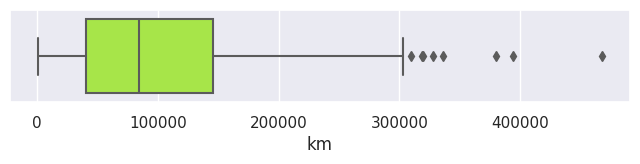

In [17]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['km'], color="greenyellow")

### Boxplot (seaborn) km per year

<Axes: xlabel='km_per_year'>

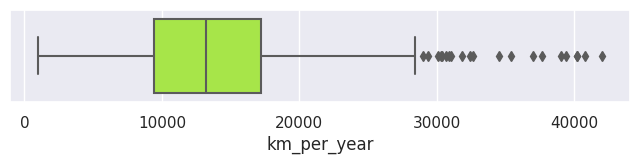

In [18]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['km_per_year'], color="greenyellow")

### Histogram  (matplotlib)  km

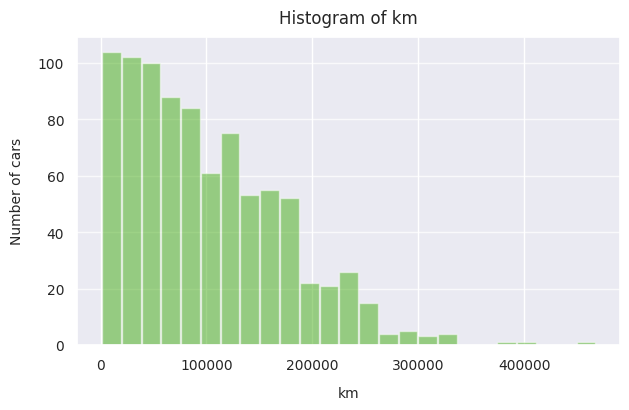

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['km'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('km', fontsize=10, labelpad=10)
plt.ylabel('Number of cars', fontsize=10, labelpad=10)
plt.title('Histogram of km', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Interpretation

The histogram illustrates the distribution of car mileages in a dataset. Most cars have low to moderate mileage, with the frequency of cars dramatically decreasing as mileage increases. The distribution is right-skewed, indicating that higher mileages are less common among the cars sampled

### Histogram  (matplotlib)  km per year

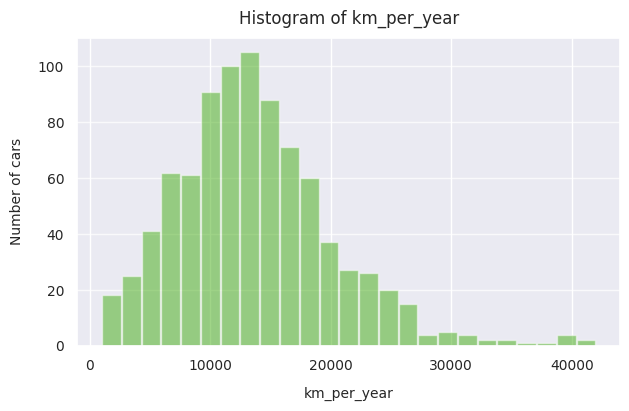

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out non-finite values from 'km_per_year' column
filtered_km_per_year = df['km_per_year'][np.isfinite(df['km_per_year'])]

# Plot Histogram
fig = plt.figure(figsize=(7, 4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=filtered_km_per_year,
                            bins=25,
                            color='#42AD12',
                            alpha=0.5,
                            rwidth=0.95
                            )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('km_per_year', fontsize=10, labelpad=10)
plt.ylabel('Number of cars', fontsize=10, labelpad=10)
plt.title('Histogram of km_per_year', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Density plot  (seaborn) km per year

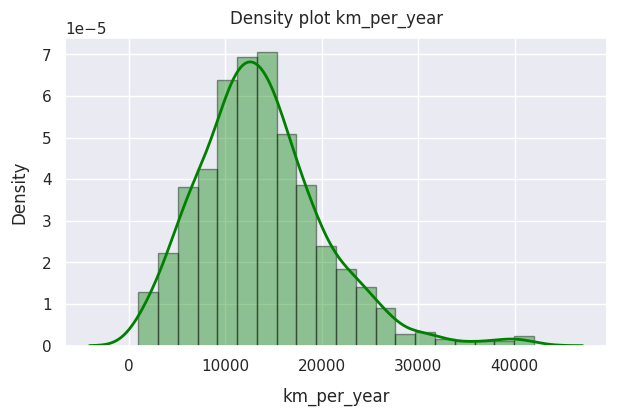

In [21]:
# Filter out non-finite values from 'km_per_year' column
filtered_km_per_year = df['km_per_year'][np.isfinite(df['km_per_year'])]

plt.figure(figsize=(7, 4))
sns.distplot(filtered_km_per_year,
             hist=True,
             kde=True,
             bins=20,
             color='green',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 2},
             )
plt.title('Density plot km_per_year', fontsize=12, pad=10)
plt.xlabel('km_per_year', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()


### Density plot  (seaborn) km

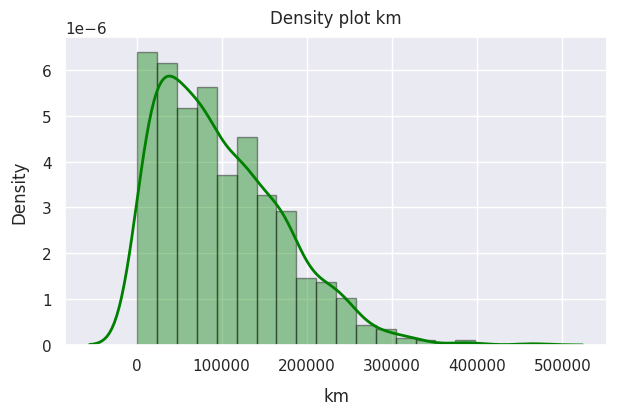

In [22]:
plt.figure(figsize=(7,4))
sns.distplot(df['km'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot km', fontsize=12, pad=10)
plt.xlabel('km', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot km

           km       var
212    1000.0 -1.353528
687    1000.0 -1.353528
370    1500.0 -1.346648
738    2000.0 -1.339768
586    2000.0 -1.339768
..        ...       ...
459  328000.0  3.145704
6    336000.0  3.255777
608  380000.0  3.861179
81   394000.0  4.053806
344  467664.0  5.067358

[877 rows x 2 columns]


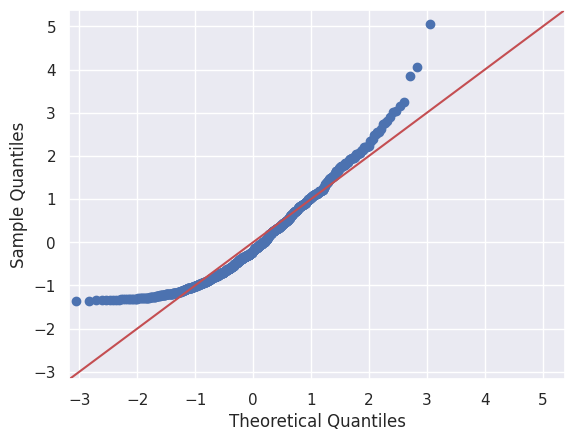

In [23]:
# Variable (standardized)
x = 'km'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['km', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

In [24]:
# Group data by km_per_year (only the topmost 15 values are shown)
df_bar = df['km_per_year'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
index

[14000.0,
 18000.0,
 17000.0,
 6600.0,
 19000.0,
 24000.0,
 18500.0,
 inf,
 10750.0,
 11000.0,
 12500.0,
 6500.0,
 9400.0,
 13500.0,
 15000.0]

### Piechart (matplotlib)

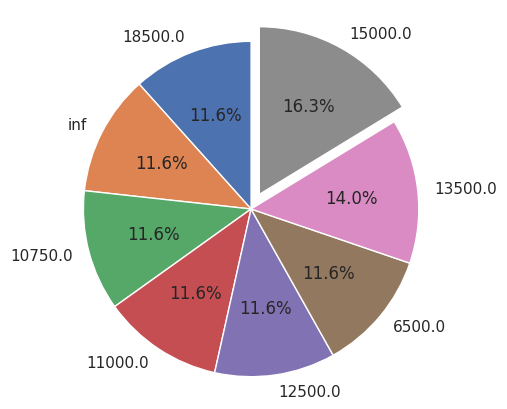

In [25]:
# Group data by km_per_year (only the 8 most frequently occurencies by km_per_year)
df_bar = df.km_per_year.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0, 0.0, 0, 0, 0.1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

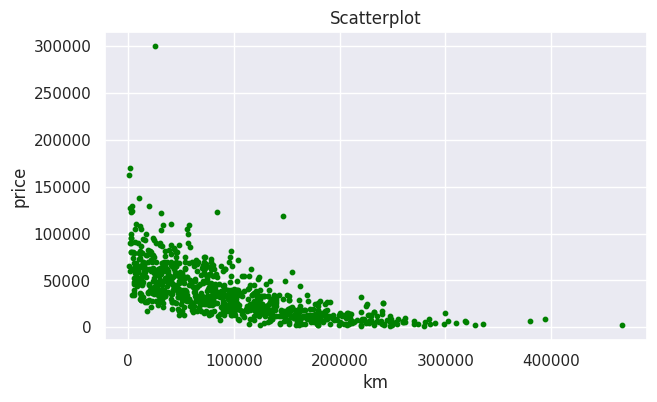

In [26]:
plt.figure(figsize=(7,4))
plt.scatter(df['km'], 
           df['price'], 
           color="green", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('km')
plt.ylabel('price')
plt.show()

### Scatterplot (matplotlib) with regression line

(877, 9)
-0.2505212723325187
61737.187006515596


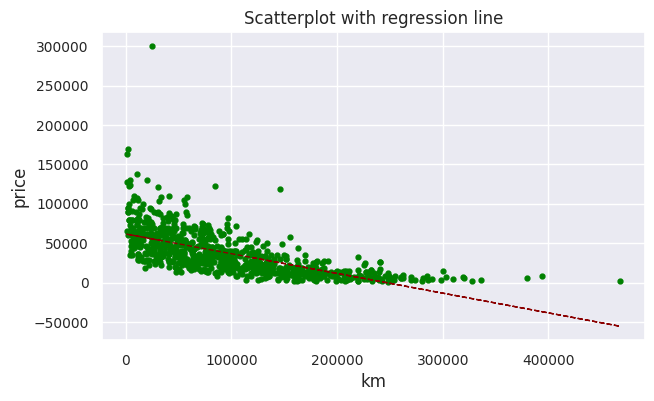

In [27]:
# Subset
df_sub = df.loc[(df.price >= 1000)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.km, 
         df_sub.price, 
         'o', 
         markersize=3.5,
         color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.km, df_sub.price, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.km, 
         b*df_sub.km + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('km', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

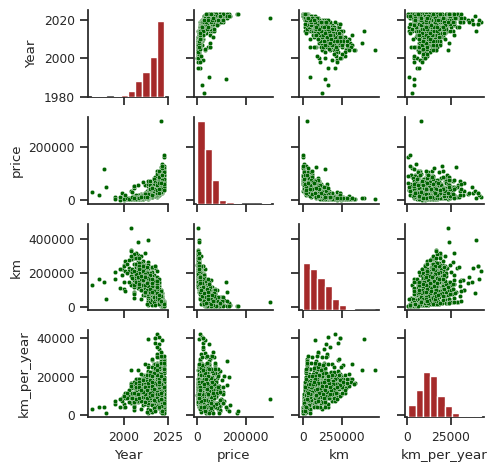

In [28]:
# Filter out non-finite values from selected columns
selected_columns = ['Year', 'price', 'km', 'km_per_year']
filtered_data = df[selected_columns].replace([np.inf, -np.inf], np.nan).dropna()

sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(filtered_data, height=1.2, aspect=1)

g.map_upper(sns.scatterplot, color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

plt.show()

### Hexagonal binning plot  (matplotlib)

(413, 9)


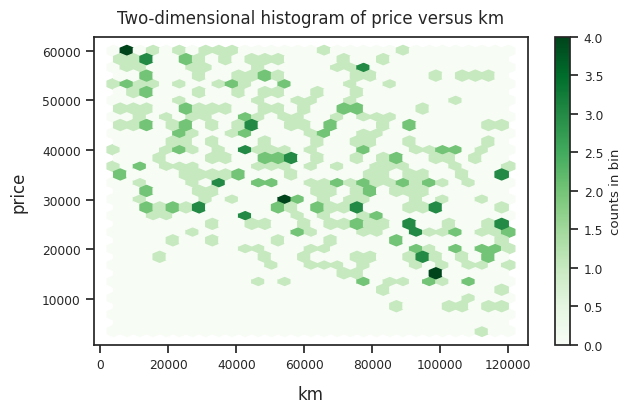

In [29]:
# Subset
df_sub = df.loc[(df.km <= 120000) & (df.price <= 60000)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.km, df_sub.price, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('km', fontsize=12, labelpad=10)
plt.ylabel('price', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of price versus km', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

### Correlation heatmap (seaborn)

<Axes: >

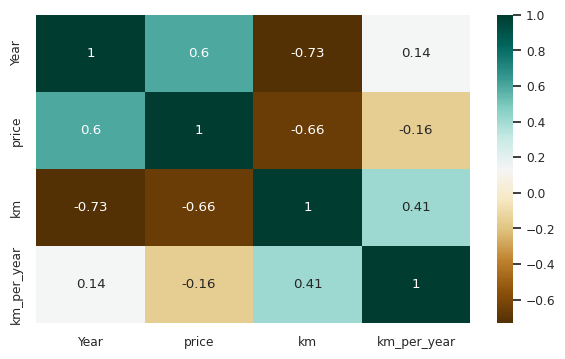

In [30]:
# Set font size for plot
sns.set(font_scale=0.8)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df[[  'Year',
                    'price',
                    'km',
                    'km_per_year']].corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Bubble plot (seaborn)

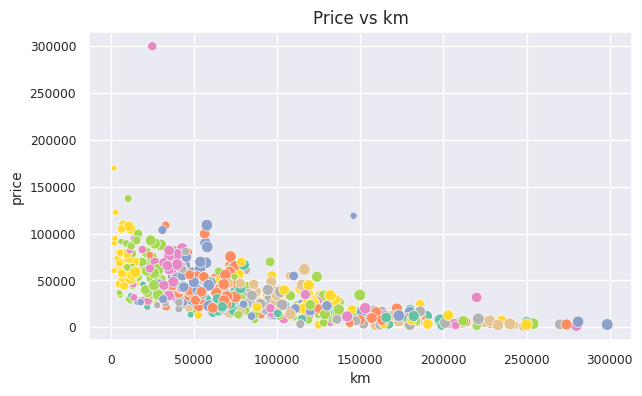

In [31]:
# Subset of df
df_sub = df.loc[(df['km_per_year'] >= 2000) & (df['km_per_year'] <= 15000)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="km", 
                     y="price",
                     size="km_per_year", # determines bubble size
                     hue="Year",  # determines color
                     palette="Set2",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs km', fontsize = 12)
ax.set_xlabel('km', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [32]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.2.0-1018-azure
Datetime: 2024-01-12 23:32:54
Python Version: 3.10.13
-----------------------------------
